## Introduction:

The power of random forest lies in its ability to be used for both (regression and classification)

### References: 

- https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/
- https://www.datacamp.com/community/tutorials/random-forests-classifier-python
- https://towardsdatascience.com/understanding-random-forest-58381e0602d2

## 1. Random Forest (RF) Mechanism: 

- Radnom Forest is one of the most powerful and effective machine learning algorithms. 
- It's used in both tasks (Classification and Regression) as a supervised learning algorithm. 
- Mainly, it's idea is based on the decision tree algorithm (a forest is a set of trees), combined together. 
- In fact, a more trees it has, a more robust the results are.
- The main idea of RF is that, it creates decision trees on randomly selected data samples, gets prediction from each tree and selects the best solution by means of voting. 

### How RF works (in case of prediction task) .. 
1. Select random samples from a given dataset.
2. Construct a decision tree for each sample and get a prediction result from each decision tree.
3. Perform a vote for each predicted result.
4. Select the prediction result with the most votes as the final prediction. 

As demonestrated below ..

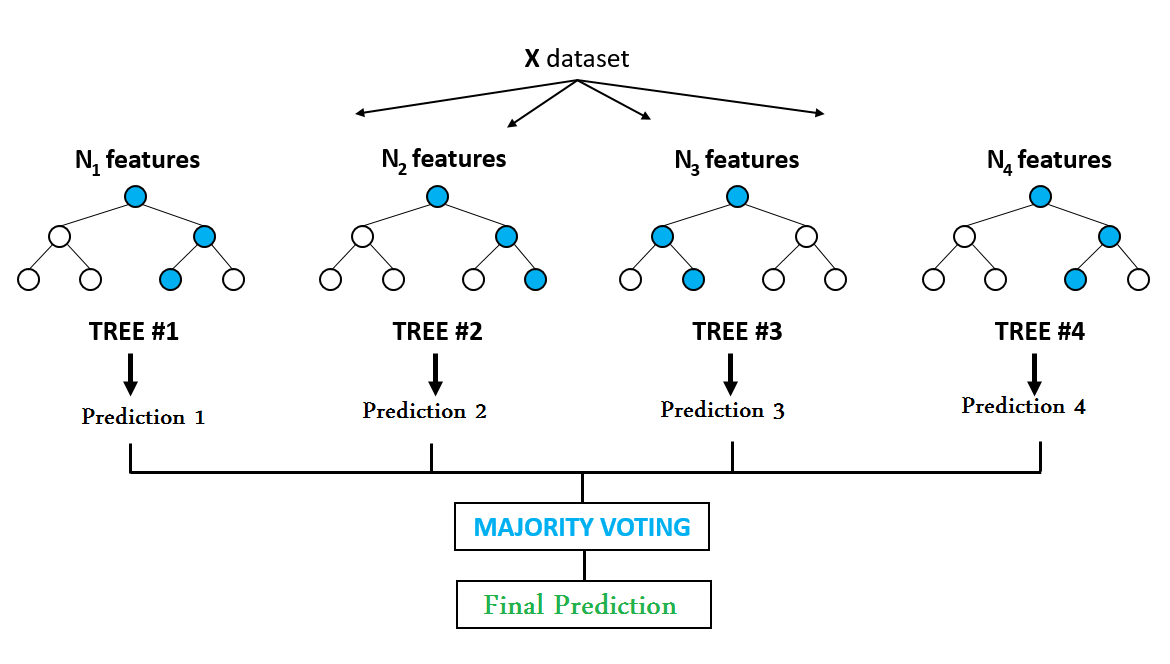

In [2]:
from IPython.display import Image
Image("RF.png")

## 2. Applications of RF:

- RF has many applications including recommendation engines, image classification and feature selection. 
- It also can be used to classify loyal loan applicants, identify fraudulent activity and predict diseases.
- Hence, it can be used in many industries, i.e. Banking, Telecom, Retail

## 3. Pros and Cons of RF:

### 3.1. Pros: 
1. RF provides highly accurate and robust results because of the number of decision trees participating in the process.
2. It does not suffer from the overfitting problem (As it takes the average (i.e. median) of all the predictions, which cancels out the biases).
3. It can be used in both classification and regression tasks.
4. RF can also handle missing values. There are two ways to handle these: using median values to replace continuous variables, and computing the proximity-weighted average of missing values.
5. It provides a pretty good indicator of the feature importance.

### 3.2. Cons:
1. It is slow in generating predictions because it has multiple decision trees. 
2. The model is difficult to interpret compared to a decision tree (where you can easily make a decision by following the path in the tree).

## 4. RF Implementation in Python

In [38]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split #training and testing split
from sklearn.preprocessing import StandardScaler  #feature scaling
from sklearn.ensemble import RandomForestRegressor  #random forest

from sklearn import metrics  #model evaluation

import matplotlib.pyplot as plt
%matplotlib inline

## Reading the data:

You can download the data from this link:

https://drive.google.com/file/d/1mVmGNx6cbfvRHC_DvF12ZL3wGLSHD9f_/view

In [18]:
# Read dataset to pandas dataframe
dataset = pd.read_csv('petrol_consumption.csv')
dataset.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


We gonna select all the features as input (X) except the last one (Petrol_consumption) to be the predicted variable (Y)

In [19]:
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

## Split data to training and testing

80-20 split!

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Feature Scaling

We need to scale the input features to make sure their values are within the same range 

In [24]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Prediction Model:
Applying random forest .. 

We gonna start with fitting the model using 20 decision trees .. 

In [26]:
regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)

apply the prediction on the fitted model .. 

In [28]:
y_pred = regressor.predict(X_test)
y_pred

array([574.1 , 514.6 , 604.8 , 589.75, 625.55, 592.5 , 594.9 , 573.3 ,
       468.55, 536.8 ])

y_pred carries the prediction of each raw in the test data ..

Meanwhile, does our model performed well or not!!

Let's evaluate its output ..

## Model Evaluation:

In [32]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 64.93201637097064


In [34]:
np.mean(dataset['Petrol_Consumption'])

576.7708333333334

root mean squared error of 64.93 is greater than 10% of the average petrol consumption ..

this indicates that the number of trees of 20 is not the option value ..

we can try another values .. 

### Fitting random forest with another value of (no. of decision trees) .. 

i.e. 200 trees

In [35]:
regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [36]:
y_pred = regressor.predict(X_test)
y_pred

array([569.205, 493.25 , 601.31 , 592.405, 607.655, 609.635, 590.265,
       570.74 , 471.455, 509.78 ])

In [37]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 59.112037818028234


mmm much better but still high root mean squared error value .. 

## Task: 
You can try to plot the error for different values of decision trees .. (hint: similar plot was plotted in KNN practice) 

This notebook illustrated random forest only in case of regression task .. and you can try to apply it on a classification task with the help of this link:

https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/

And you can do more practice about random forest through these links:
1. https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
2. https://towardsdatascience.com/an-implementation-and-explanation-of-the-random-forest-in-python-77bf308a9b76